In [1]:
# ------------------------------mount drive-------------------------------------
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Colab\ Notebooks/nonlinear-sys-id/quadrotor\ neurips/

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/nonlinear-sys-id/quadrotor neurips


In [2]:
# -------------------------- Quadcoptor --------------------------
I_xx = 4.856e-3  # (kg/m^2) moment of inertia
I_yy = 4.856e-3  # (kg/m^2) moment of inertia
I_zz = 8.801e-3  # (kg/m^2) moment of inertia
m = 0.468  # (kg)    weight
Ax = 0.25  # (kg/s)  drag force coefficients
Ay = 0.25  # (kg/s)  drag force coefficients
Az = 0.25  # (kg/s)  drag force coefficients
# --------------------------- Rotor -------------------------------
l = 0.225  # (m) distance between the rotor and the center of mass
k = 2.980e-6  # lift constant of the rotor
b = 1.140e-7  # drag constant of the rotor
I_r = 3.357e-5  # (kg/m^2) moment of inertia

ground_truth = [1 / m, -Ax / m, -Ay / m, -Az / m,
                (I_yy - I_zz) / I_xx, 1 / I_xx,
                (I_zz - I_xx) / I_yy, 1 / I_yy,
                (I_xx - I_yy) / I_zz, 1 / I_zz]

print("-----------------------------------------------------------------------")
print("ground truth = ", ground_truth)
print("-----------------------------------------------------------------------")

-----------------------------------------------------------------------
ground truth =  [2.1367521367521367, -0.5341880341880342, -0.5341880341880342, -0.5341880341880342, -0.8123970345963756, 205.9308072487644, 0.8123970345963756, 205.9308072487644, 0.0, 113.62345188046812]
-----------------------------------------------------------------------


# Plot all LSE

------------------------LSE Estimation Plots---------------------------------------------------------------------------


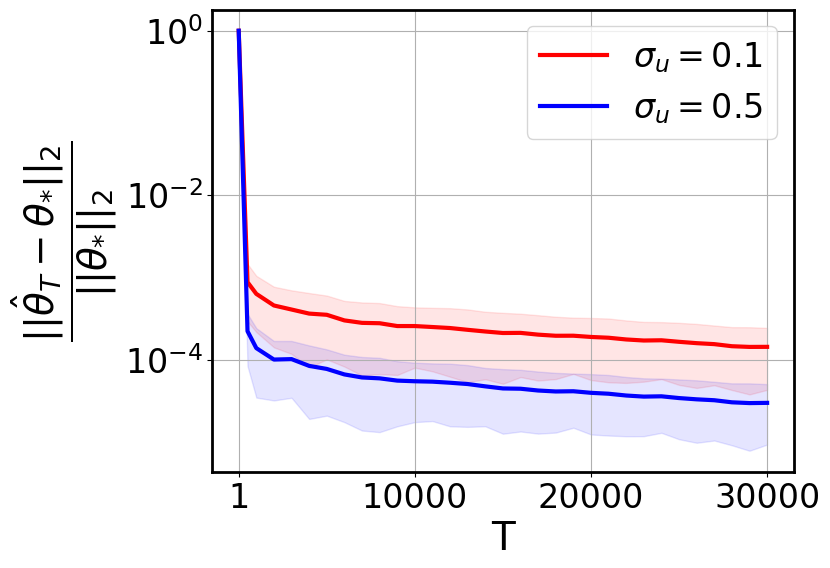

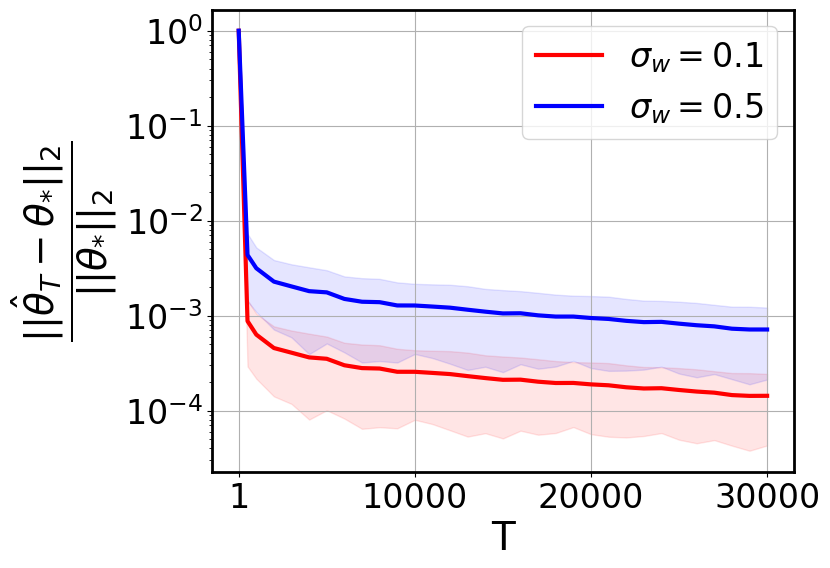

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

plt.rcParams['axes.grid'] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2

linewidth_ = 3.0
alpha_ = 0.1

log_scale = True
normalize = True   # True means normalize the individual error when plotting

time_hor_ = [1, 500]
time_hor_.extend(range(1000, 30001, 1000))
time_hor = time_hor_
# print(time_hor)

c0 = 1
if normalize:
  c0 = np.linalg.norm(ground_truth)


print('------------------------LSE Estimation Plots---------------------------------------------------------------------------')



#  ---------------------------------------------------trunc_Guassian--------------------------------------------- sigma_u
fig = plt.figure(figsize=(7.5, 6))
name5 = 'lse_data1_w_trunc_guass_[0.0, 0.1, 1]_u_trunc_guass_[0.0, 0.1, 1]_[1, 0.2, 0.2, 0.2].csv'
name6 = 'lse_data2_w_trunc_guass_[0.0, 0.1, 1]_u_trunc_guass_[0.0, 0.1, 1]_[1, 0.2, 0.2, 0.2].csv'
mean_1 = np.loadtxt(name5, delimiter=',')
std_1 = np.loadtxt(name6, delimiter=',')
points_1 = []
errors_1 = []
for j in range(len(mean_1)):
  points_1.append(np.linalg.norm(mean_1[j]) / c0)
  errors_1.append(np.linalg.norm(std_1[j]) / c0)
label1 = '$\sigma_{u} = 0.1$'
plt.plot(time_hor, points_1, color='red', label=label1, linewidth=linewidth_)
plt.fill_between(time_hor, np.array(points_1) - np.array(errors_1), np.array(points_1) + np.array(errors_1), color='red', alpha=alpha_)


name7 = 'lse_data1_w_trunc_guass_[0.0, 0.1, 1]_u_trunc_guass_[0.0, 0.5, 1]_[1, 0.2, 0.2, 0.2].csv'
name8 = 'lse_data2_w_trunc_guass_[0.0, 0.1, 1]_u_trunc_guass_[0.0, 0.5, 1]_[1, 0.2, 0.2, 0.2].csv'
mean_2 = np.loadtxt(name7, delimiter=',')
std_2 = np.loadtxt(name8, delimiter=',')
points_2 = []
errors_2 = []
for j in range(len(mean_2)):
  points_2.append(np.linalg.norm(mean_2[j]) / c0)
  errors_2.append(np.linalg.norm(std_2[j]) / c0)
label2 = '$\sigma_{u} = 0.5$'
plt.plot(time_hor, points_2, color='blue', label=label2, linewidth=linewidth_)
plt.fill_between(time_hor, np.array(points_2) - np.array(errors_2), np.array(points_2) + np.array(errors_2), color='blue', alpha=alpha_)


plt.xticks([1, 10000, 20000, 30000])
plt.xlabel('T')
if normalize:
  plt.ylabel('$\\dfrac{||\hat{\\theta}_{T} - \\theta_{*}||_{2}}{||\\theta_{*}||_{2}}$')
else:
  plt.ylabel('$||\hat{\\theta}_{T} - \\theta_{*}||_{2}$')
plt.legend()
if log_scale:
  plt.yscale('log')



#  ---------------------------------------------------trunc_Guassian--------------------------------------------- sigma_w
fig = plt.figure(figsize=(7.5, 6))
name5 = 'lse_data1_w_trunc_guass_[0.0, 0.1, 1]_u_trunc_guass_[0.0, 0.1, 1]_[1, 0.2, 0.2, 0.2].csv'
name6 = 'lse_data2_w_trunc_guass_[0.0, 0.1, 1]_u_trunc_guass_[0.0, 0.1, 1]_[1, 0.2, 0.2, 0.2].csv'
mean_1 = np.loadtxt(name5, delimiter=',')
std_1 = np.loadtxt(name6, delimiter=',')
points_1 = []
errors_1 = []
for j in range(len(mean_1)):
  points_1.append(np.linalg.norm(mean_1[j]) / c0)
  errors_1.append(np.linalg.norm(std_1[j]) / c0)
label1 = '$\sigma_{w} = 0.1$'
plt.plot(time_hor, points_1, color='red', label=label1, linewidth=linewidth_)
plt.fill_between(time_hor, np.array(points_1) - np.array(errors_1), np.array(points_1) + np.array(errors_1), color='red', alpha=alpha_)


name7 = 'lse_data1_w_trunc_guass_[0.0, 0.5, 1]_u_trunc_guass_[0.0, 0.1, 1]_[1, 0.2, 0.2, 0.2].csv'
name8 = 'lse_data2_w_trunc_guass_[0.0, 0.5, 1]_u_trunc_guass_[0.0, 0.1, 1]_[1, 0.2, 0.2, 0.2].csv'
mean_2 = np.loadtxt(name7, delimiter=',')
std_2 = np.loadtxt(name8, delimiter=',')
points_2 = []
errors_2 = []
for j in range(len(mean_2)):
  points_2.append(np.linalg.norm(mean_2[j]) / c0)
  errors_2.append(np.linalg.norm(std_2[j]) / c0)
label2 = '$\sigma_{w} = 0.5$'
plt.plot(time_hor, points_2, color='blue', label=label2, linewidth=linewidth_)
plt.fill_between(time_hor, np.array(points_2) - np.array(errors_2), np.array(points_2) + np.array(errors_2), color='blue', alpha=alpha_)


plt.xticks([1, 10000, 20000, 30000])
plt.xlabel('T')
if normalize:
  plt.ylabel('$\\dfrac{||\hat{\\theta}_{T} - \\theta_{*}||_{2}}{||\\theta_{*}||_{2}}$')
else:
  plt.ylabel('$||\hat{\\theta}_{T} - \\theta_{*}||_{2}$')
plt.legend()
if log_scale:
  plt.yscale('log')

plt.show()

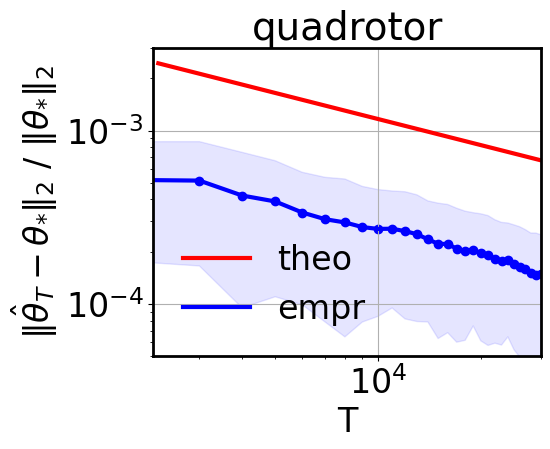

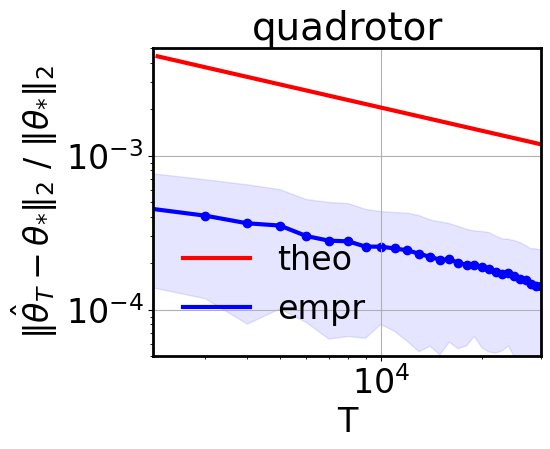

In [18]:
from re import M
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)   # fontsize of the figure title

plt.rcParams['axes.grid'] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2

normalize = True
log_scale_x = True
log_scale_y = True

if normalize:
  c_norm = np.linalg.norm(np.array(ground_truth))
else:
  c_norm = 1


colors = ['red', 'blue']

linewidth_ = 3.0
alpha_ = 0.1

# time_hor = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900]
# time_hor.extend([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
# time_hor.extend([10000, 15000, 20000, 25000, 30000])
# time_hor_ = time_hor

time_hor_ = [1, 500]
time_hor_.extend(range(1000, 30001, 1000))
time_hor = time_hor_


# --------------------------------------------------Uniform---------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------------------
s_phi = 0.0005
p_phi = 0.7
b_phi = 1e-3
w_max = 0.001
sigma_w = 0.001

fig = plt.figure(figsize=(5, 4))

name1 = 'lse_theo_bound_1_w_uniform_0.005773502691896258_s_phi_0.05_p_phi_0.8_delta_0.1.csv'
name2 = 'lse_theo_bound_2_w_uniform_0.005773502691896258_s_phi_0.05_p_phi_0.8_delta_0.1.csv'
time_list = np.loadtxt(name1, delimiter=',')
theo_bound = np.loadtxt(name2, delimiter=',')/c_norm
label1 = 'theo'
plt.plot(time_list[:time_hor_[-1]], theo_bound[:time_hor_[-1]], color=colors[0], label=label1, linewidth=linewidth_)

name1 = 'lse_data1_w_uniform_[-1, 1]_u_uniform_[-1, 1]_[1, 0.2, 0.2, 0.2].csv'
name2 = 'lse_data2_w_uniform_[-1, 1]_u_uniform_[-1, 1]_[1, 0.2, 0.2, 0.2].csv'
time_list = time_hor_
mean_theta_hat_list = np.loadtxt(name1, delimiter=',')
std_theta_hat_list = np.loadtxt(name2, delimiter=',')
points = []
errors = []
for j in range(len(mean_theta_hat_list)):
  points.append(np.linalg.norm(mean_theta_hat_list[j]) / c_norm)
  errors.append(np.linalg.norm(std_theta_hat_list[j]) / c_norm)
label1 = 'empr'
ind = 1
plt.plot(time_list[ind:], points[ind:], color=colors[1], label=label1, linewidth=linewidth_)
plt.scatter(time_list[ind:], points[ind:], color=colors[1], marker='o')
plt.fill_between(time_list[ind:], np.array(points[ind:]) - np.array(errors[ind:]), np.array(points[ind:]) + np.array(errors[ind:]), color=colors[1], alpha=alpha_)

plt.xlim([2000+200, 30000+1])
plt.ylim([5e-5, 3e-3])
if log_scale_x:
  plt.xscale('log')
if log_scale_y:
  plt.yscale('log')
plt.yticks([1e-4, 1e-3])

plt.xlabel('T')
if normalize:
  # plt.ylabel('$\dfrac{\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}}{\|\\theta_{*}\|_{2}}$')
  plt.ylabel('$\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}\ {/} \ \|\\theta_{*}\|_{2}$')
else:
  plt.ylabel('$\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}$')

plt.title('quadrotor')
plt.legend(ncol=1, loc='best', framealpha=0.0)

# --------------------------------------------------Truncated Gaussian---------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------------------
s_phi = 0.0005
p_phi = 0.7
b_phi = 1e-3
w_max = 0.01
sigma_w = 0.001

fig = plt.figure(figsize=(5, 4))

name1 = 'lse_theo_bound_1_w_trunc_guass_0.001_s_phi_0.01_p_phi_0.95_delta_0.1.csv'
name2 = 'lse_theo_bound_2_w_trunc_guass_0.001_s_phi_0.01_p_phi_0.95_delta_0.1.csv'
time_list = np.loadtxt(name1, delimiter=',')
theo_bound = 5*np.loadtxt(name2, delimiter=',')/c_norm
label1 = 'theo'
plt.plot(time_list[:time_hor_[-1]], theo_bound[:time_hor_[-1]], color=colors[0], label=label1, linewidth=linewidth_)

name1 = 'lse_data1_w_trunc_guass_[0.0, 0.1, 1]_u_trunc_guass_[0.0, 0.1, 1]_[1, 0.2, 0.2, 0.2].csv'
name2 = 'lse_data2_w_trunc_guass_[0.0, 0.1, 1]_u_trunc_guass_[0.0, 0.1, 1]_[1, 0.2, 0.2, 0.2].csv'
time_list = time_hor_
mean_theta_hat_list = np.loadtxt(name1, delimiter=',')
std_theta_hat_list = np.loadtxt(name2, delimiter=',')
points = []
errors = []
for j in range(len(mean_theta_hat_list)):
  points.append(np.linalg.norm(mean_theta_hat_list[j]) / c_norm)
  errors.append(np.linalg.norm(std_theta_hat_list[j]) / c_norm)
label1 = 'empr'
ind = 1
plt.plot(time_list[ind:], points[ind:], color=colors[1], label=label1, linewidth=linewidth_)
plt.scatter(time_list[ind:], points[ind:], color=colors[1], marker='o')
plt.fill_between(time_list[ind:], np.array(points[ind:]) - np.array(errors[ind:]), np.array(points[ind:]) + np.array(errors[ind:]), color=colors[1], alpha=alpha_)

plt.xlim([2000+100, 30000+1])
plt.ylim([5e-5, 5e-3])
if log_scale_x:
  plt.xscale('log')
if log_scale_y:
  plt.yscale('log')
plt.yticks([1e-4, 1e-3])

plt.xlabel('T')
if normalize:
  # plt.ylabel('$\dfrac{\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}}{\|\\theta_{*}\|_{2}}$')
  plt.ylabel('$\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}\ {/} \ \|\\theta_{*}\|_{2}$')
else:
  plt.ylabel('$\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}$')

# plt.legend()
plt.title('quadrotor')
plt.legend(ncol=1, loc='best', framealpha=0.0)


plt.show()

# Plot SME all

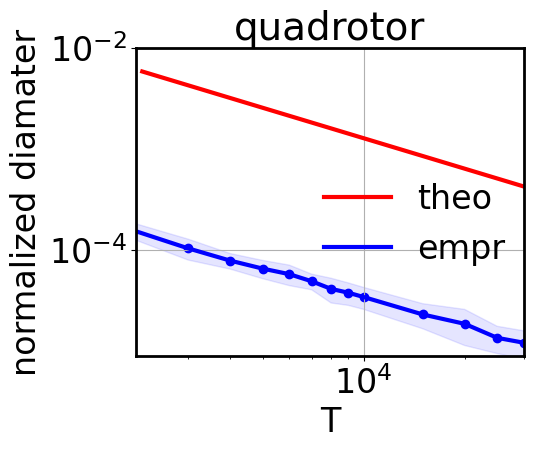

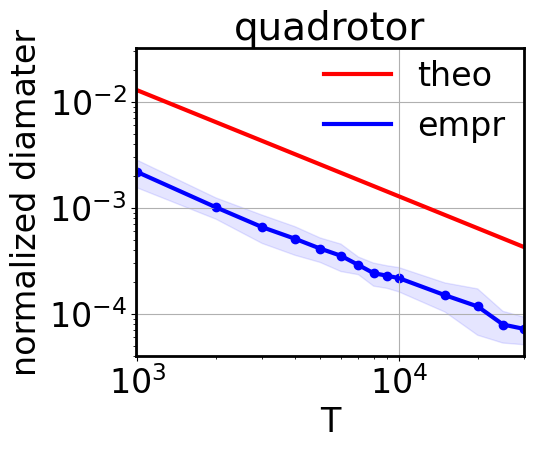

In [22]:
from re import M
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba

SMALL_SIZE = 24
MEDIUM_SIZE = 24
BIGGER_SIZE = 28

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)     # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)   # fontsize of the figure title

plt.rcParams['axes.grid'] = True
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 2

normalize = True
log_scale_x = True
log_scale_y = True

if normalize:
  c_norm = np.linalg.norm(np.array(ground_truth))
else:
  c_norm = 1

time_hor = [10, 100, 200, 300, 400, 500, 600, 700, 800, 900]
time_hor.extend([1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000])
time_hor.extend([10000, 15000, 20000, 25000, 30000])


colors = ['red', 'blue']

linewidth_ = 3.0
alpha_ = 0.1


# --------------------------------------------------Uniform---------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------------------
s_phi = 0.05 # estimated
p_phi = 0.8 # estimated
b_phi = 5 # estimated
w_max = 0.01

fig = plt.figure(figsize=(5, 4))

name1 = 'sme_theo_bound_1_w_uniform__0.005773502691896258_s_phi_0.05_p_phi_0.8_eps_0.1.csv'
name2 = 'sme_theo_bound_2_w_uniform__0.005773502691896258_s_phi_0.05_p_phi_0.8_eps_0.1.csv'
time_list = np.loadtxt(name1, delimiter=',')
theo_bound = np.loadtxt(name2, delimiter=',')/c_norm
label1 = 'theo'
plt.plot(time_list, theo_bound, color=colors[0], label=label1, linewidth=linewidth_)

name1 = 'sme_data1_w_uniform_[-1, 1]_u_uniform_[-1, 1]_[1, 0.2, 0.2, 0.2].csv'
name2 = 'sme_data2_w_uniform_[-1, 1]_u_uniform_[-1, 1]_[1, 0.2, 0.2, 0.2].csv'
time_list = time_hor
mean_theta_hat_list = np.loadtxt(name1, delimiter=',')
std_theta_hat_list = np.loadtxt(name2, delimiter=',')
points = []
errors = []
for j in range(len(mean_theta_hat_list)):
  points.append(np.linalg.norm(mean_theta_hat_list[j]) / c_norm)
  errors.append(np.linalg.norm(std_theta_hat_list[j]) / c_norm)
label1 = 'empr'
ind = 1
plt.plot(time_list[ind:], points[ind:], color=colors[1], label=label1, linewidth=linewidth_)
plt.scatter(time_list[ind:], points[ind:], color=colors[1], marker='o')
plt.fill_between(time_list[ind:], np.array(points[ind:]) - np.array(errors[ind:]), np.array(points[ind:]) + np.array(errors[ind:]), color=colors[1], alpha=alpha_)

plt.xlim([2000+100, 30000+10])
plt.ylim([9e-6, 1e-2])
if log_scale_x:
  plt.xscale('log')
if log_scale_y:
  plt.yscale('log')
# plt.yticks([1e-4, 1e-3, 1e-2])

plt.xlabel('T')
if normalize:
  # plt.ylabel('$\dfrac{\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}}{\|\\theta_{*}\|_{2}}$')
  plt.ylabel('normalized diamater')
else:
  plt.ylabel('diameter')

# plt.legend()
plt.title('quadrotor')
plt.legend(ncol=1, loc=(0.45, 0.25), framealpha=0.0)

# --------------------------------------------------Truncated Gaussian---------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------------------------------------
s_phi = 0.05 # estimated
p_phi = 0.95 # estimated
b_phi = 2 # estimated
w_max = 0.01
sigma_w = 0.005

fig = plt.figure(figsize=(5, 4))

name1 = 'sme_theo_bound_1_w_trunc__0.005_s_phi_0.05_p_phi_0.95_eps_0.1.csv'
name2 = 'sme_theo_bound_2_w_trunc__0.005_s_phi_0.05_p_phi_0.95_eps_0.1.csv'
time_list = np.loadtxt(name1, delimiter=',')
theo_bound = np.loadtxt(name2, delimiter=',')/c_norm
label1 = 'theo'
plt.plot(time_list, theo_bound, color=colors[0], label=label1, linewidth=linewidth_)

name1 = 'sme_data1_w_trunc_guass_[0.0, 0.5, 2]_u_trunc_guass_[0.0, 0.5, 2]_[1, 0.2, 0.2, 0.2].csv'
name2 = 'sme_data2_w_trunc_guass_[0.0, 0.5, 2]_u_trunc_guass_[0.0, 0.5, 2]_[1, 0.2, 0.2, 0.2].csv'
time_list = time_hor
mean_theta_hat_list = np.loadtxt(name1, delimiter=',')
std_theta_hat_list = np.loadtxt(name2, delimiter=',')
points = []
errors = []
for j in range(len(mean_theta_hat_list)):
  points.append(np.linalg.norm(mean_theta_hat_list[j]) / c_norm)
  errors.append(np.linalg.norm(std_theta_hat_list[j]) / c_norm)
label1 = 'empr'
ind = 1
plt.plot(time_list[ind:], points[ind:], color=colors[1], label=label1, linewidth=linewidth_)
plt.scatter(time_list[ind:], points[ind:], color=colors[1], marker='o')
plt.fill_between(time_list[ind:], np.array(points[ind:]) - np.array(errors[ind:]), np.array(points[ind:]) + np.array(errors[ind:]), color=colors[1], alpha=alpha_)

plt.xlim([1000-10, 30000+10])
plt.ylim([4e-5, None])
if log_scale_x:
  plt.xscale('log')
if log_scale_y:
  plt.yscale('log')
# plt.yticks([1e-4, 1e-3, 1e-2])

plt.xlabel('T')
if normalize:
  # plt.ylabel('$\dfrac{\|\hat{\\theta}_{T} - \\theta_{*}\|_{2}}{\|\\theta_{*}\|_{2}}$')
  plt.ylabel('normalized diamater')
else:
  plt.ylabel('diameter')

# plt.legend()
plt.title('quadrotor')
plt.legend(ncol=1, loc=(0.45, 0.65), framealpha=0.0)


plt.show()